In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def analytical_potential(r, a, b, phi_a, phi_b):
    return (phi_b - phi_a)/np.log(b/a) * np.log(r/a) + phi_a

def analytical_e(r, a, b, phi_a, phi_b):
    return -(phi_b - phi_a)/np.log(b/a) * 1/r

In [3]:
potential = np.genfromtxt('output/electric_potential.csv',
                          skip_header=1, usecols=[2, 6], delimiter=',')
refined_potential = np.genfromtxt('output/electric_potential_refined.csv',
                                  skip_header=1, usecols=[2, 6], delimiter=',')

an_potential = analytical_potential(potential[:, 0], 0.5, 3, 5, 0)
percent_difference = (an_potential-potential[:, 1])/an_potential*100
ref_percent_difference = (an_potential-refined_potential[:, 1])/an_potential*100

fig, ax = plt.subplots(1, 2, figsize=(12,5))
ax[0].plot(potential[:, 0], potential[:, 1],
           '-', linewidth=5, label="FEniCS Solution")
ax[0].plot(refined_potential[:, 0], refined_potential[:, 1],
           '-.', linewidth=4, label="Refined FEniCS Solution")
ax[0].plot(potential[:, 0], an_potential,
           '--', linewidth=2, label="Analytical Solution")
ax[0].legend(loc=0)
ax[0].set_title("Finite Element vs. Analytical Solution")
ax[0].set_xlabel("s position")
ax[0].set_ylabel("Electric Potential")

ax[1].plot(potential[:, 0], percent_difference, label="Original Mesh")
ax[1].plot(refined_potential[:, 0], ref_percent_difference, label="Refined Mesh")
ax[1].set_title("Percentage Difference")
ax[1].set_xlabel("s position")
ax[1].set_ylabel("Percent Difference")
plt.legend(loc=0)
plt.show()

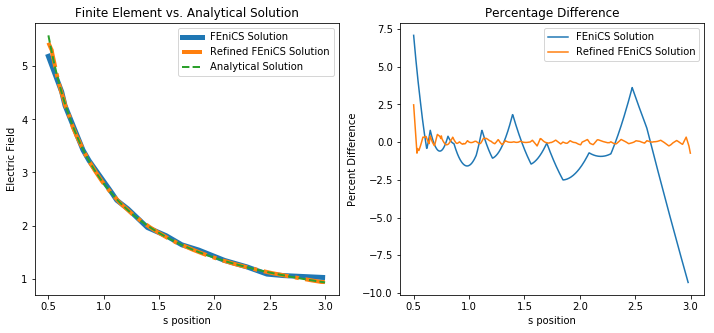

In [4]:
field = np.genfromtxt('output/electric_field.csv',
                      skip_header=1, usecols=[2, 7], delimiter=',')
refined_field = np.genfromtxt('output/electric_field_refined.csv',
                      skip_header=1, usecols=[2, 7], delimiter=',')

an_field = analytical_e(field[:, 0], 0.5, 3, 5, 0)
e_percent_diff = (an_field - field[:, 1])/an_field * 100
e_percent_diff_ref = (an_field - refined_field[:, 1])/an_field * 100

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(field[:, 0], field[:, 1], linewidth=5, label="FEniCS Solution")
ax[0].plot(field[:, 0], refined_field[:, 1], '-.', linewidth=4, label="Refined FEniCS Solution")
ax[0].plot(field[:, 0], an_field, '--',
         linewidth=2, label="Analytical Solution")
ax[0].legend(loc=0)
ax[0].set_xlabel("s position")
ax[0].set_ylabel("Electric Field")
ax[0].set_title("Finite Element vs. Analytical Solution")

ax[1].plot(field[:, 0], e_percent_diff, label="FEniCS Solution")
ax[1].plot(refined_field[:, 0], e_percent_diff_ref, label="Refined FEniCS Solution")
ax[1].set_title("Percentage Difference")
ax[1].set_xlabel("s position")
ax[1].set_ylabel("Percent Difference")
ax[1].legend(loc=0)
plt.show()